In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os


train_dir = 'DevanagariHandwrittenCharacterDataset/Train'
test_dir = 'DevanagariHandwrittenCharacterDataset/Test'

# Parameters
img_height, img_width = 64, 64
batch_size = 32
epochs = 5

# Data augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 17000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [3]:

#baseline model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


model.save('handwritten_indian_digit_classifier.h5')


C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


531/531 ━━━━━━━━━━━━━━━━━━━━ 106s 188ms/step - accuracy: 0.4563 - loss: 1.5340 - val_accuracy: 0.9234 - val_loss: 0.2196
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step - accuracy: 0.8750 - loss: 0.4841 - val_accuracy: 0.7500 - val_loss: 0.5199
Epoch 3/5


C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


531/531 ━━━━━━━━━━━━━━━━━━━━ 95s 177ms/step - accuracy: 0.7896 - loss: 0.6219 - val_accuracy: 0.9624 - val_loss: 0.1216
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step - accuracy: 0.7812 - loss: 0.7033 - val_accuracy: 0.9583 - val_loss: 0.0957
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 95s 176ms/step - accuracy: 0.8385 - loss: 0.4725 - val_accuracy: 0.9661 - val_loss: 0.0966
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9654 - loss: 0.1015


Test Accuracy: 96.64%


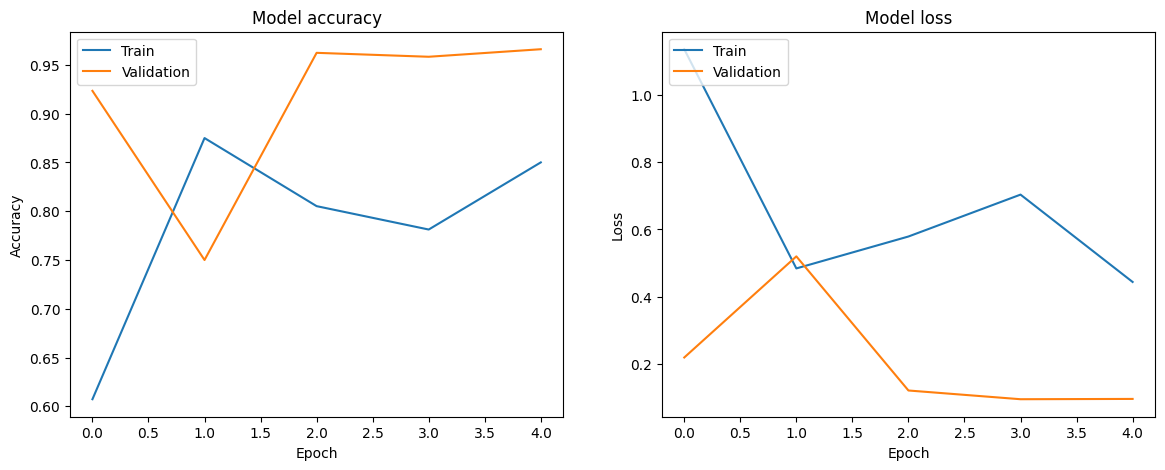

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [5]:
def build_baseline_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the model
model.save('handwritten_indian_digit_classifier.h5')

Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 92s 172ms/step - accuracy: 0.8653 - loss: 0.3875 - val_accuracy: 0.9778 - val_loss: 0.0812
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 118us/step - accuracy: 0.9375 - loss: 0.1440 - val_accuracy: 1.0000 - val_loss: 0.0571
Epoch 3/5


C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


531/531 ━━━━━━━━━━━━━━━━━━━━ 92s 172ms/step - accuracy: 0.8969 - loss: 0.3182 - val_accuracy: 0.9758 - val_loss: 0.0780
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.9375 - loss: 0.2605 - val_accuracy: 0.9583 - val_loss: 0.0977
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 88s 164ms/step - accuracy: 0.9014 - loss: 0.3071 - val_accuracy: 0.9882 - val_loss: 0.0467
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9879 - loss: 0.0449


Test Accuracy: 98.82%


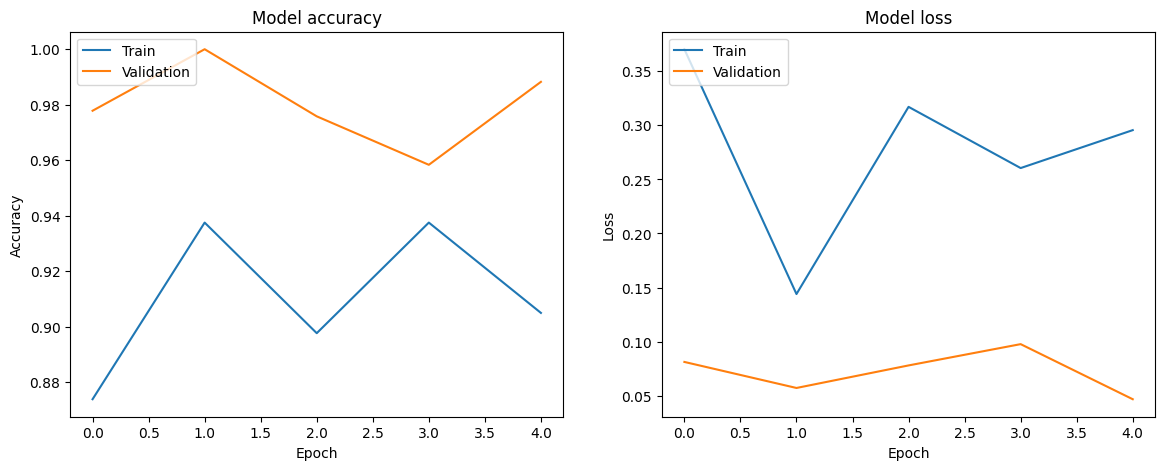

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [7]:
def build_wider_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the model
model.save('handwritten_indian_digit_classifier.h5')

Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 88s 164ms/step - accuracy: 0.9093 - loss: 0.2708 - val_accuracy: 0.9896 - val_loss: 0.0387
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 107us/step - accuracy: 0.9688 - loss: 0.1276 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 3/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 87s 162ms/step - accuracy: 0.9163 - loss: 0.2487 - val_accuracy: 0.9849 - val_loss: 0.0519
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.9688 - loss: 0.0696 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 86s 161ms/step - accuracy: 0.9285 - loss: 0.2261 - val_accuracy: 0.9872 - val_loss: 0.0514
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9867 - loss: 0.0578


Test Accuracy: 98.69%


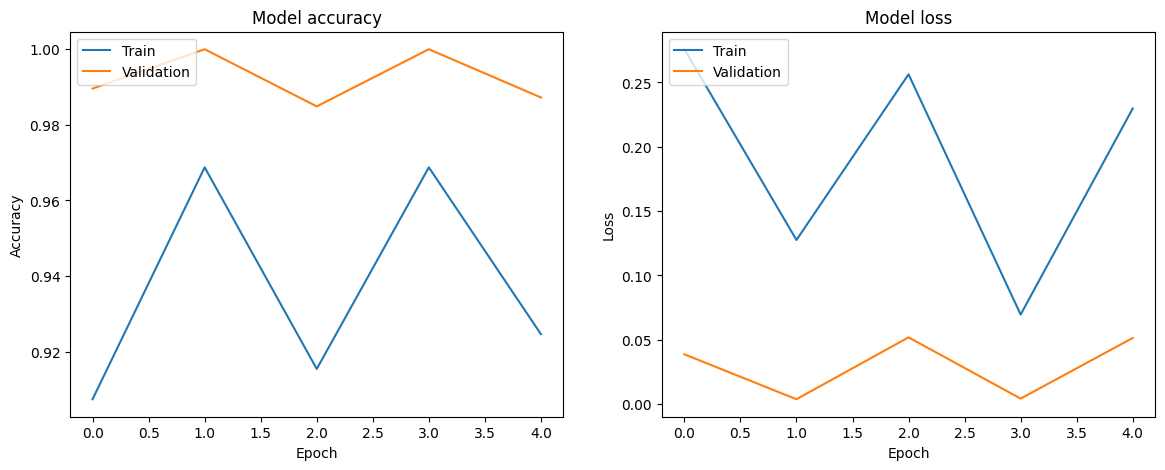

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [9]:
def build_deeper_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 87s 163ms/step - accuracy: 0.9286 - loss: 0.2220 - val_accuracy: 0.9899 - val_loss: 0.0373
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 103us/step - accuracy: 0.8750 - loss: 0.2032 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 3/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 112s 210ms/step - accuracy: 0.9293 - loss: 0.2110 - val_accuracy: 0.9906 - val_loss: 0.0329
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - accuracy: 0.8125 - loss: 0.5070 - val_accuracy: 1.0000 - val_loss: 0.0210
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 130s 241ms/step - accuracy: 0.9327 - loss: 0.2046 - val_accuracy: 0.9923 - val_loss: 0.0296
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9918 - loss: 0.0274
Test Accuracy: 99.23%


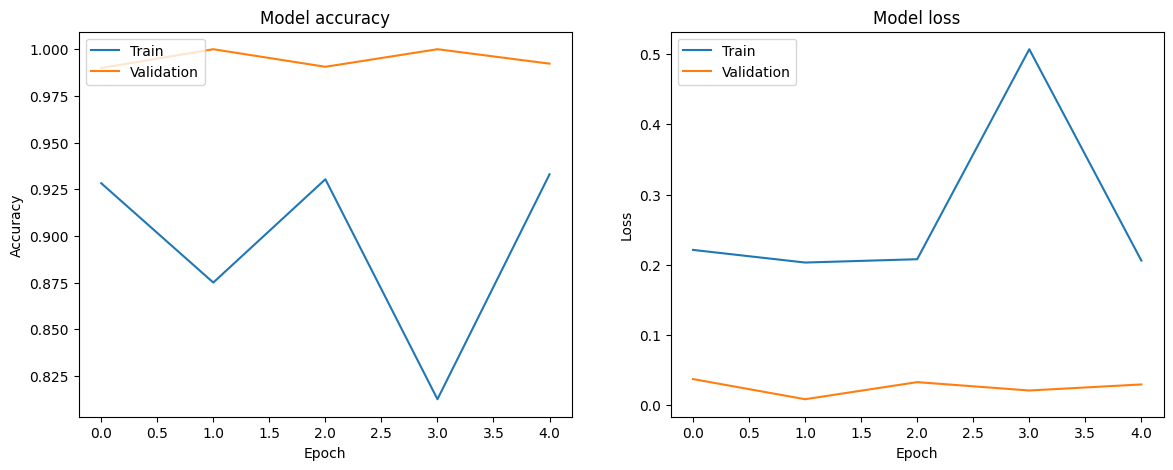

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
def build_model_with_batch_norm():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 93s 174ms/step - accuracy: 0.9380 - loss: 0.1968 - val_accuracy: 0.9859 - val_loss: 0.0411
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step - accuracy: 0.9375 - loss: 0.1817 - val_accuracy: 0.9583 - val_loss: 0.2011
Epoch 3/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 91s 170ms/step - accuracy: 0.9383 - loss: 0.1911 - val_accuracy: 0.9862 - val_loss: 0.0403
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.9062 - loss: 0.2845 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 91s 170ms/step - accuracy: 0.9390 - loss: 0.1878 - val_accuracy: 0.9906 - val_loss: 0.0322
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9881 - loss: 0.0502
Test Accuracy: 99.03%


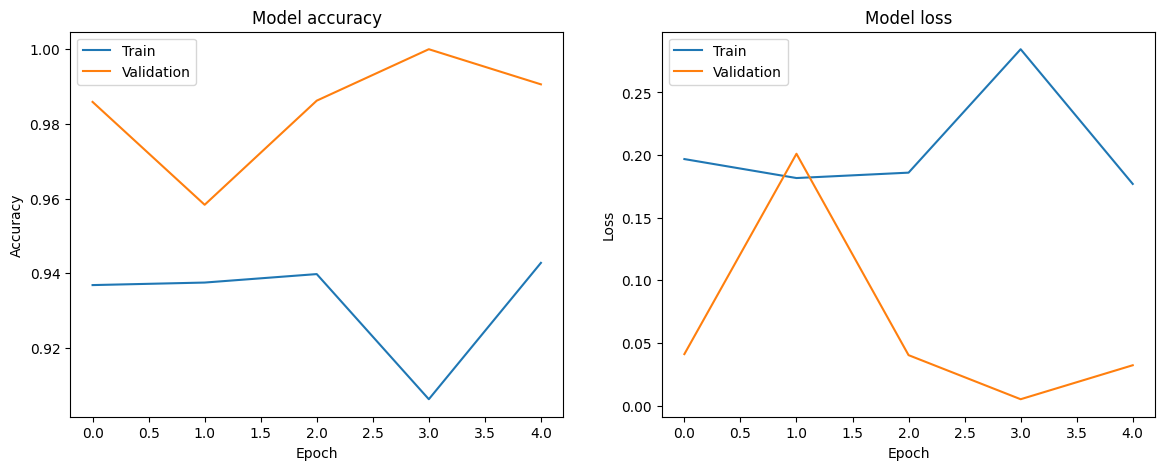

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [13]:
#the simplest model

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (0-9 digits)
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

C:\Users\jpodk\anaconda3\envs\general-uni-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 69s 127ms/step - accuracy: 0.4195 - loss: 1.6834 - val_accuracy: 0.8091 - val_loss: 0.5509
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.5938 - loss: 0.9460 - val_accuracy: 0.8333 - val_loss: 0.6132
Epoch 3/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 65s 122ms/step - accuracy: 0.7188 - loss: 0.8311 - val_accuracy: 0.8784 - val_loss: 0.3717
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.7500 - loss: 0.7776 - val_accuracy: 0.8333 - val_loss: 0.4768
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 80s 118ms/step - accuracy: 0.7770 - loss: 0.6500 - val_accuracy: 0.8686 - val_loss: 0.3728
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8697 - loss: 0.3760
Test Accuracy: 86.79%


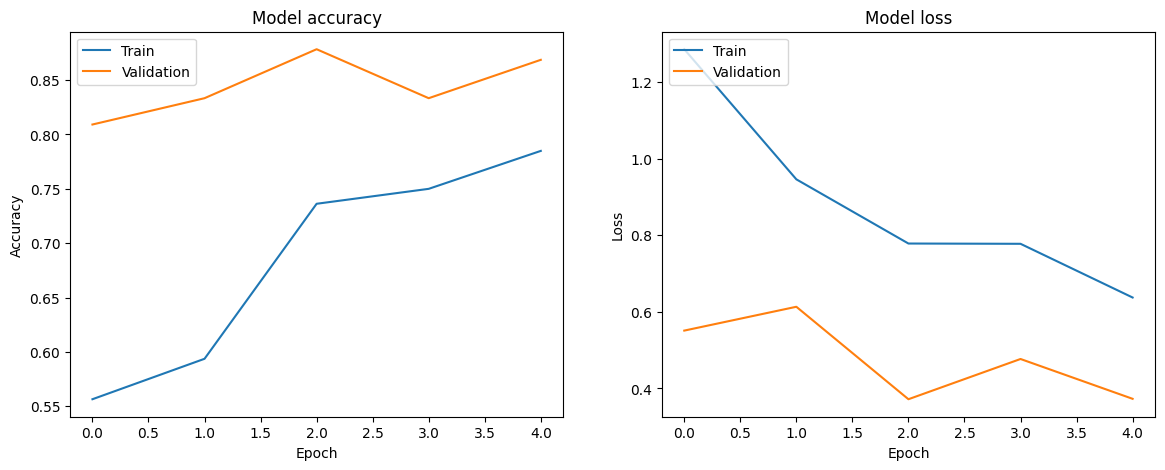

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()